# **Disease Prediction System using Machine Learning**

> This program develops a disease prediction system by preprocessing health data, training models (Random Forest, Gradient Boosting, XGBoost), and evaluating their accuracy. It also includes hyperparameter tuning for optimal performance, providing reliable predictions based on key health indicators.




In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("/content/Cardiovascular_Disease_Dataset.csv")

# Display the first few rows
df.head()


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
# Check for missing values
df.isnull().sum()


,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


In [4]:
# Handle outliers (if any)
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

# Separate features and target variable
X = df.drop("target", axis=1)
y = df["target"]


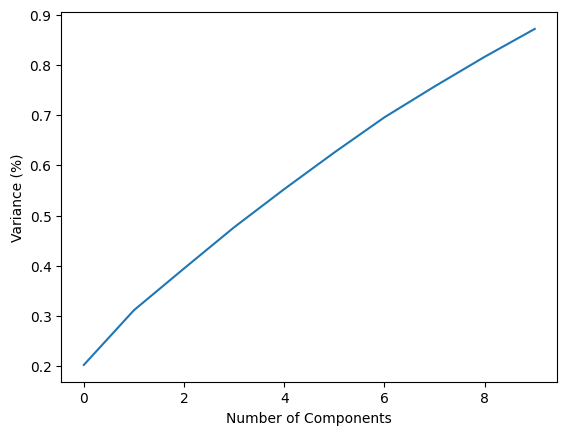

In [5]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=10)  # You can choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio to see the amount of variance each principal component explains
explained_variance = pca.explained_variance_ratio_
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.show()


Random Forest Accuracy: 0.96
Random Forest Cross-Validation Scores: [0.965 0.995 0.965 0.985 0.96 ]
Random Forest Mean Cross-Validation Score: 0.9739999999999999

Gradient Boosting Accuracy: 0.95
Gradient Boosting Cross-Validation Scores: [0.97  1.    0.965 0.99  0.975]
Gradient Boosting Mean Cross-Validation Score: 0.9799999999999999

XGBoost Accuracy: 0.95
XGBoost Cross-Validation Scores: [0.97  0.99  0.95  0.985 0.955]
XGBoost Mean Cross-Validation Score: 0.97



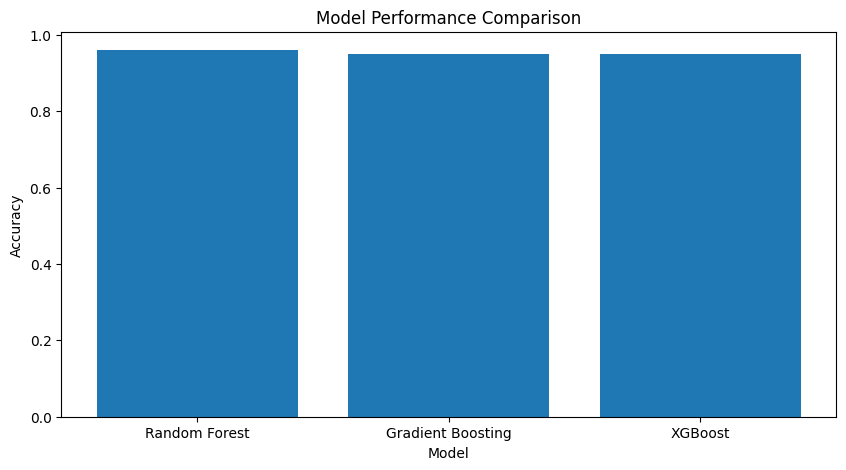

In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize models with advanced techniques
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

    # Cross-validation
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} Cross-Validation Scores: {scores}")
    print(f"{name} Mean Cross-Validation Score: {scores.mean()}")
    print()

# Plot model performance
plt.figure(figsize=(10, 5))
plt.bar(model_performance.keys(), model_performance.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()


In [10]:
# Hyperparameter Tuning for XGBoost (as an example)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Train the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the final model on the test set
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("----------------------------------------------------------")
print(f"Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("----------------------------------------------------------")
print(f"Classification Report: ")
print(classification_report(y_test, y_pred))


Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Score: 0.93625
Accuracy: 0.955
----------------------------------------------------------
Confusion Matrix: 
[[ 79   4]
 [  5 112]]
----------------------------------------------------------
Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        83
           1       0.97      0.96      0.96       117

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.95      0.96       200

